# Importing the necessary packages for data visualization and loading

The opencv library cv2 is used for reading the images one by one and matplotlib library is used for visualizing the image

In [5]:
cd Waste-Management/

/home/vhaiju/Desktop/Waste-Management


In [6]:
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

# Loading and Visualizing the Data

In [7]:
organic1 = cv2.imread('DATASET/TRAIN/O/O_1.jpg')

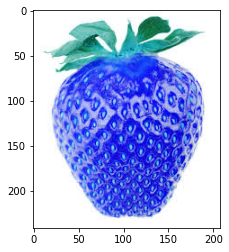

In [8]:
plt.imshow(organic1)

In [9]:
organic1 = cv2.cvtColor(organic1, cv2.COLOR_BGR2RGB)

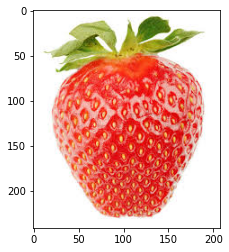

In [10]:
plt.imshow(organic1)

In [11]:
organic1.shape

(242, 208, 3)

In [12]:
organic1.max()

255

In [13]:
recycle10 = cv2.imread('DATASET/TRAIN/R/R_10.jpg')

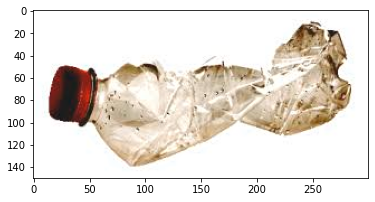

In [14]:
plt.imshow(recycle10)

In [15]:
recycle10 = cv2.cvtColor(recycle10, cv2.COLOR_RGB2BGR)

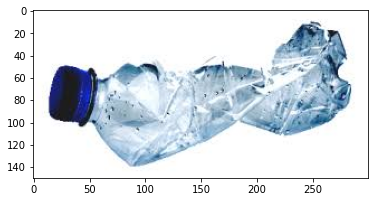

In [16]:
plt.imshow(recycle10)

In [17]:
recycle10.shape

(150, 300, 3)

In [18]:
recycle10.max()

255

<b> Visualizing a random set of 25 training images mixed from both the Organics and Recyclables Class </b>

        - 'O' denotes the Organics class
        - 'R' denotes the Recyclables class

In [19]:
import glob
from PIL import Image
import matplotlib.image as mpimg

In [20]:
organicImages = [{'O': cv2.imread(file)} for file in glob.glob("DATASET/TRAIN/O/*.jpg")]

In [21]:
organicImages = [{'O': cv2.cvtColor(organicImages[i]['O'], cv2.COLOR_BGR2RGB)} for i in range(len(organicImages))]

In [22]:
RecyclablesImages = [{'R': cv2.imread(file)} for file in glob.glob("DATASET/TRAIN/R/*.jpg")]

In [23]:
RecyclablesImages = [{'R': cv2.cvtColor(RecyclablesImages[i]['R'], cv2.COLOR_BGR2RGB)} for i in range(len(RecyclablesImages))]

In [24]:
trainImages = organicImages + RecyclablesImages

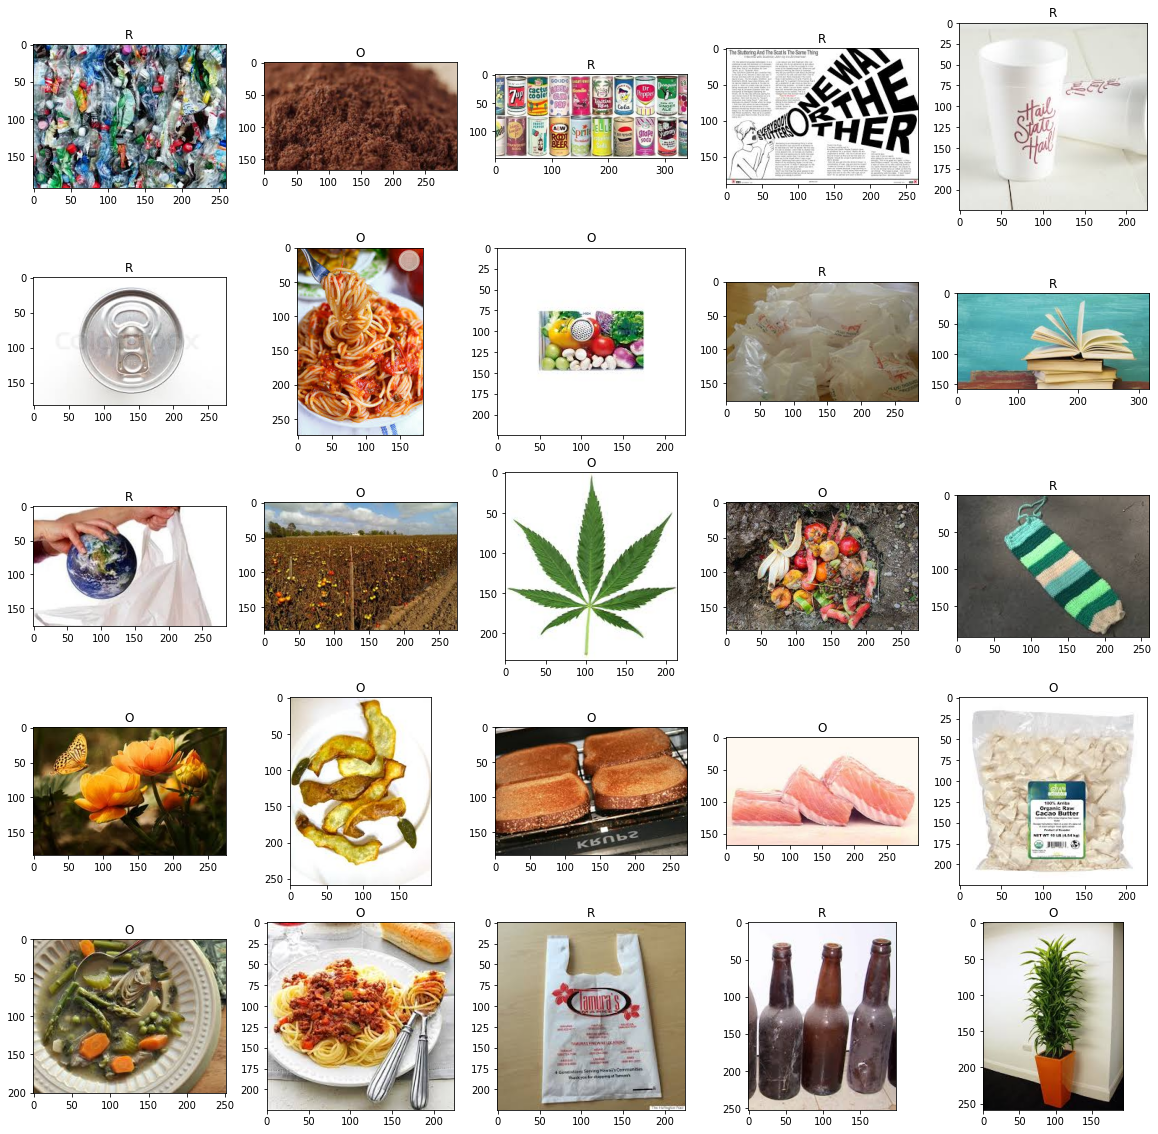

In [25]:
import random
fig = plt.figure(figsize=(20,20))
for i, img in enumerate(random.choices(trainImages, k=25), 1):
    #print(i, img)
    for key, val in img.items():
        #print(key)
        if key == 'R':
            ax = fig.add_subplot(5,5,i)
            #print(val)
            plt.title('R')
            ax.imshow(val)
        elif key == 'O':
            ax = fig.add_subplot(5,5,i)
            #print(l)
            plt.title('O')
            ax.imshow(val)
        #mpplot.show()

# Preparing the data for the model 

Since the dataset is huge, it is impossible to read it all at once in memory. The built-in functions in Keras library are used to automatically process the data and manipulate the images. Manipulating the images with rotation, resizing and scaling are useful to expose the model to different images thereby making it more robust. The *ImageDataGenerator* function in Keras library can perform the above operations automatically

In [83]:
from keras.preprocessing.image import ImageDataGenerator

Using TensorFlow backend.


In [84]:
image_gen = ImageDataGenerator(rotation_range=30, # rotate the image 30 degrees
                               width_shift_range=0.1, # Shift the pic width by a max of 10%
                               height_shift_range=0.1, # Shift the pic height by a max of 10%
                               rescale=1/255, # Rescale the image by normalzing it.
                               shear_range=0.2, # Shear means cutting away part of the image (max 20%)
                               zoom_range=0.2, # Zoom in by 20% max
                               horizontal_flip=True, # Allo horizontal flipping
                               fill_mode='nearest' # Fill in missing pixels with the nearest filled value
                              )

Using the above variable *image_gen* we can show how this technique applies to a single image. Let us apply this on the *recycle10* image that we've visualized above

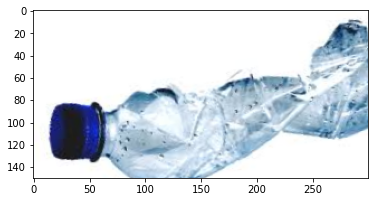

In [85]:
plt.imshow(image_gen.random_transform(recycle10))

It can be seen that the orientation of the image has changed.Consequently, new versions of the image will be generated everytime *random_transform* is applied to the image 

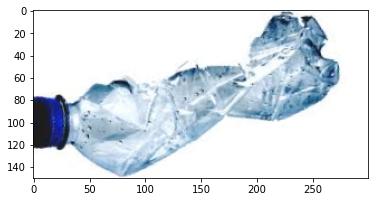

In [86]:
plt.imshow(image_gen.random_transform(recycle10))

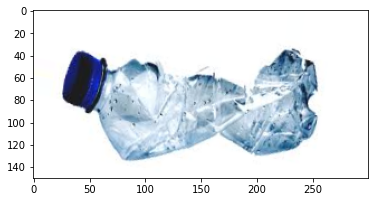

In [87]:
plt.imshow(image_gen.random_transform(recycle10))

<b> Generating many manipulated images from a directory </b>

As we saw how to manipulate a single image, we can now apply it to the input data that we have. We use .flow_from_directory for this process. This module requires that the images be organized in sub-directories. In our case, this is satisfied as the directories contain images of each class Organics and Recyclables in separate folders.

                Image Data Folder
                Organics (O)
                O_1.jpg
                O_2.jpg
                ...
                Recyclables (R)
                R_1.jpg
                R_2.jpg
                


In [88]:
image_gen.flow_from_directory('DATASET/TRAIN')

Found 22564 images belonging to 2 classes.


In [89]:
image_gen.flow_from_directory('DATASET/TEST')

Found 2513 images belonging to 2 classes.


<b> Resizing Images </b>


A closer look at the image data shows that all the images are not of the same size. In order for the CNN to perform well, it is required that all the images are of the same shape. Keras can be used to resize all the images to n x n pixels once they have been manipulated. Here we choose n = 150.


In [90]:
#Width, Height, Channels
image_shape = (150, 150, 3)

# Creating the Model

In [91]:
from keras.models import Sequential
from keras.layers import Activation, Dropout, Flatten, Dense, Conv2D, MaxPooling2D, BatchNormalization
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

In [92]:
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(3,3),input_shape=(150,150,3), activation='relu',))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=64, kernel_size=(3,3),input_shape=(150,150,3), activation='relu',))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=64, kernel_size=(3,3),input_shape=(150,150,3), activation='relu',))
model.add(MaxPooling2D(pool_size=(2, 2)))


model.add(Flatten())


model.add(Dense(128))
model.add(Activation('relu'))

# Dropouts help reduce overfitting by randomly turning neurons off during training.
# Here we say randomly turn off 50% of neurons.
model.add(Dropout(0.5))

# Last layer, remember its binary, 0=cat , 1=dog
model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])


In [93]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 34, 34, 64)        36928     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 17, 17, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 18496)            

<b> Training the Model </b>

In [94]:
batch_size = 16

train_image_gen = image_gen.flow_from_directory('DATASET/TRAIN',
                                               target_size=image_shape[:2],
                                               batch_size=batch_size,
                                               class_mode='binary')

Found 22564 images belonging to 2 classes.


In [95]:
batch_size = 16

test_image_gen = image_gen.flow_from_directory('DATASET/TEST',
                                               target_size=image_shape[:2],
                                               batch_size=batch_size,
                                               class_mode='binary')

Found 2513 images belonging to 2 classes.


In [96]:
train_image_gen.class_indices

{'O': 0, 'R': 1}

'O' denotes Organics and is associated with a binary value of 0
'R' denotes Recyclables and is associated with a binary value of 1

In [90]:
import warnings
warnings.filterwarnings('ignore')

In [97]:
results = model.fit_generator(train_image_gen,epochs=100,
                              steps_per_epoch=150,
                              validation_data=test_image_gen,
                             validation_steps=12)

Epoch 1/100
150/150 [==============================] - 29s 193ms/step - loss: 0.5351 - accuracy: 0.7492 - val_loss: 0.4692 - val_accuracy: 0.8281
Epoch 2/100
150/150 [==============================] - 28s 187ms/step - loss: 0.4457 - accuracy: 0.8067 - val_loss: 0.1321 - val_accuracy: 0.8438
Epoch 3/100
150/150 [==============================] - 28s 188ms/step - loss: 0.4660 - accuracy: 0.7952 - val_loss: 0.3142 - val_accuracy: 0.8854
Epoch 4/100
150/150 [==============================] - 28s 187ms/step - loss: 0.4659 - accuracy: 0.7979 - val_loss: 0.4488 - val_accuracy: 0.8438
Epoch 5/100
150/150 [==============================] - 29s 190ms/step - loss: 0.4415 - accuracy: 0.8154 - val_loss: 0.3008 - val_accuracy: 0.8906
Epoch 6/100
150/150 [==============================] - 29s 191ms/step - loss: 0.4488 - accuracy: 0.8033 - val_loss: 0.5692 - val_accuracy: 0.8125
Epoch 7/100
150/150 [==============================] - 28s 189ms/step - loss: 0.4353 - accuracy: 0.8108 - val_loss: 0.3952 -

Epoch 57/100
150/150 [==============================] - 27s 182ms/step - loss: 0.3470 - accuracy: 0.8562 - val_loss: 0.0989 - val_accuracy: 0.9062
Epoch 58/100
150/150 [==============================] - 27s 183ms/step - loss: 0.3380 - accuracy: 0.8683 - val_loss: 0.1072 - val_accuracy: 0.8490
Epoch 59/100
150/150 [==============================] - 27s 182ms/step - loss: 0.3197 - accuracy: 0.8704 - val_loss: 0.1608 - val_accuracy: 0.8542
Epoch 60/100
150/150 [==============================] - 27s 183ms/step - loss: 0.3361 - accuracy: 0.8658 - val_loss: 0.3726 - val_accuracy: 0.8698
Epoch 61/100
150/150 [==============================] - 27s 182ms/step - loss: 0.3282 - accuracy: 0.8642 - val_loss: 0.3330 - val_accuracy: 0.9062
Epoch 62/100
150/150 [==============================] - 27s 182ms/step - loss: 0.3280 - accuracy: 0.8675 - val_loss: 0.2577 - val_accuracy: 0.8750
Epoch 63/100
150/150 [==============================] - 28s 183ms/step - loss: 0.3549 - accuracy: 0.8583 - val_loss: 0

In [98]:
model.save('wasteClassificationCNN.h5')

# Evaluating the Model

In [99]:
results.history['accuracy']

[0.74916667,
 0.8066667,
 0.79522616,
 0.79791665,
 0.8154167,
 0.80333334,
 0.81083333,
 0.81416667,
 0.7991667,
 0.81625,
 0.8233333,
 0.8308333,
 0.8279167,
 0.82166666,
 0.8275,
 0.8283333,
 0.84799,
 0.8204167,
 0.83375,
 0.84458333,
 0.83919597,
 0.83666664,
 0.84166664,
 0.83708334,
 0.84125,
 0.84,
 0.8495833,
 0.8516667,
 0.85583335,
 0.84087104,
 0.85083336,
 0.8375,
 0.84125,
 0.85125,
 0.84875,
 0.86375,
 0.84791666,
 0.84833336,
 0.85083336,
 0.84541667,
 0.8545833,
 0.85469013,
 0.86833334,
 0.8525,
 0.8475,
 0.8516667,
 0.8591667,
 0.86625,
 0.8647404,
 0.85791665,
 0.86333334,
 0.86125,
 0.8670833,
 0.85333335,
 0.8541667,
 0.84375,
 0.85625,
 0.86833334,
 0.87041664,
 0.86583334,
 0.8641667,
 0.8675,
 0.85833335,
 0.84125,
 0.8697655,
 0.85333335,
 0.8720833,
 0.86291665,
 0.8720833,
 0.8645833,
 0.875,
 0.86041665,
 0.86333334,
 0.86809045,
 0.8516667,
 0.87041664,
 0.8720833,
 0.8575,
 0.86934674,
 0.8545833,
 0.86625,
 0.87291664,
 0.87333333,
 0.87375,
 0.87333333,

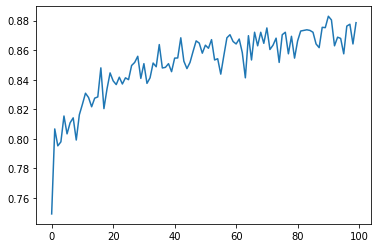

In [100]:
plt.plot(results.history['accuracy'])

# Predicting on new images

In [105]:
import numpy as np
from keras.preprocessing import image

recyclable_file = 'DATASET/TEST/R/R_10147.jpg'

recyclable_img = image.load_img(recyclable_file, target_size=(150, 150))

recyclable_img = image.img_to_array(recyclable_img)

recyclable_img = np.expand_dims(recyclable_img, axis=0)

recyclable_img = recyclable_img/255

In [106]:
prediction_prob = model.predict(recyclable_img)

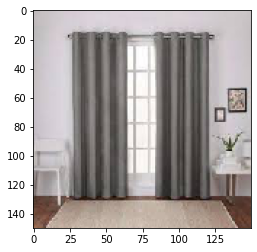

In [111]:
recyclable_img = recyclable_img.reshape(150,150,3)
plt.imshow(recyclable_img)

In [112]:
print(f'Probability that the image is a recyclable is: {prediction_prob}  ')

Probability that the image is a recyclable is: [[0.7923668]]  
